<a href="https://colab.research.google.com/github/EliMorejon24/ExamenElizabethMorejon/blob/main/TESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data'):
    for filename in filenames:
        pass

In [32]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [33]:
paths = []
labels =[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break

print('Dataset is Loaded')

Dataset is Loaded


In [34]:
len(paths)

4563

In [35]:
paths[:10]

['/content/drive/MyDrive/data/SAVEE/JK_f12.wav',
 '/content/drive/MyDrive/data/SAVEE/JE_h01.wav',
 '/content/drive/MyDrive/data/SAVEE/KL_h05.wav',
 '/content/drive/MyDrive/data/SAVEE/KL_n08.wav',
 '/content/drive/MyDrive/data/SAVEE/KL_su03.wav',
 '/content/drive/MyDrive/data/SAVEE/KL_d01.wav',
 '/content/drive/MyDrive/data/SAVEE/KL_n27.wav',
 '/content/drive/MyDrive/data/SAVEE/JK_d09.wav',
 '/content/drive/MyDrive/data/SAVEE/DC_f14.wav',
 '/content/drive/MyDrive/data/SAVEE/JE_d10.wav']

In [36]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/data/SAVEE/JK_f12.wav,f12
1,/content/drive/MyDrive/data/SAVEE/JE_h01.wav,h01
2,/content/drive/MyDrive/data/SAVEE/KL_h05.wav,h05
3,/content/drive/MyDrive/data/SAVEE/KL_n08.wav,n08
4,/content/drive/MyDrive/data/SAVEE/KL_su03.wav,su03


In [37]:
df['label'].value_counts()

angry          400
happy          400
neutral        400
disgust        400
sad            400
              ... 
farsa            1
relax            1
confidente       1
refrescante      1
delicioso        1
Name: label, Length: 335, dtype: int64

In [38]:
labels = np.array(df['label'].value_counts().index)

In [39]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

In [40]:
!pip install --upgrade librosa

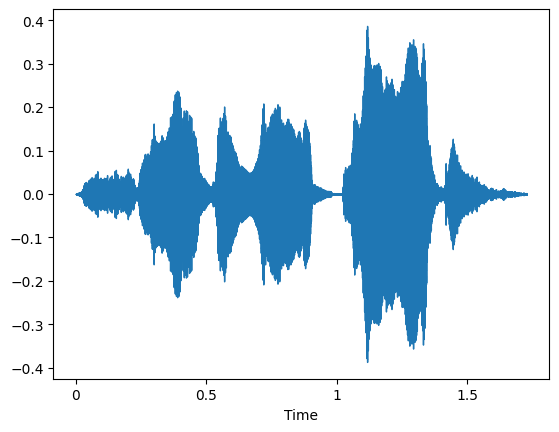

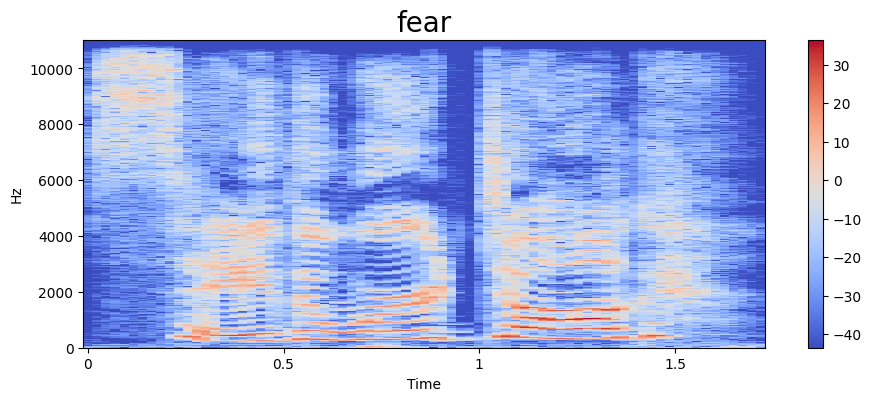

In [41]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

#display the wave of the audio file
librosa.display.waveshow(data)

#display the spectogram of audio file
spectogram(data, sampling_rate, emotion)
Audio(path)

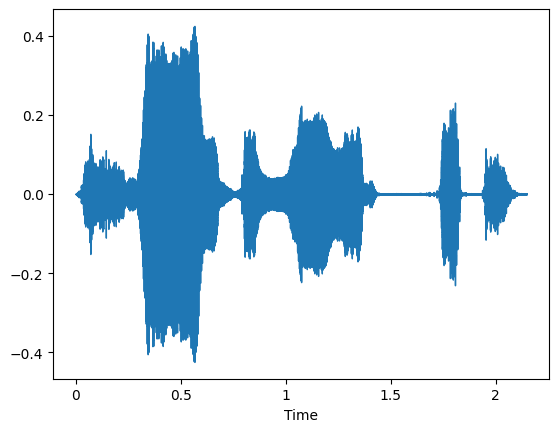

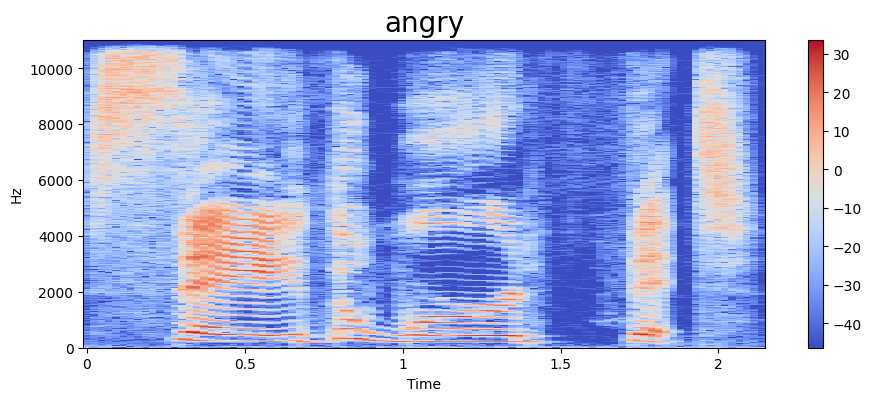

In [42]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

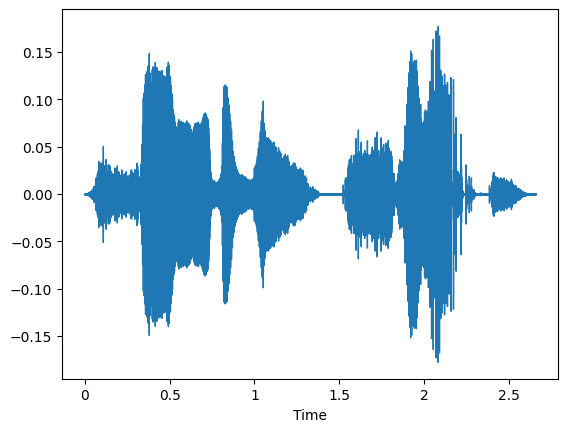

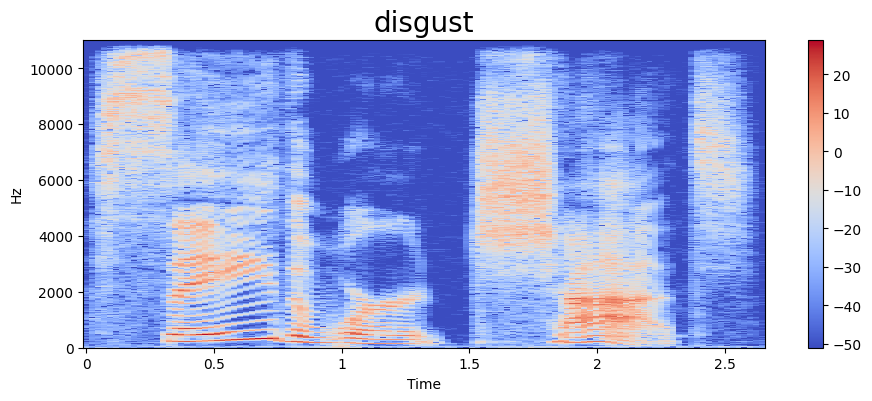

In [43]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

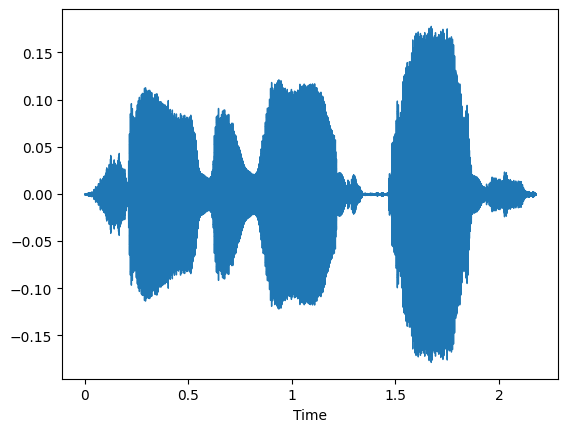

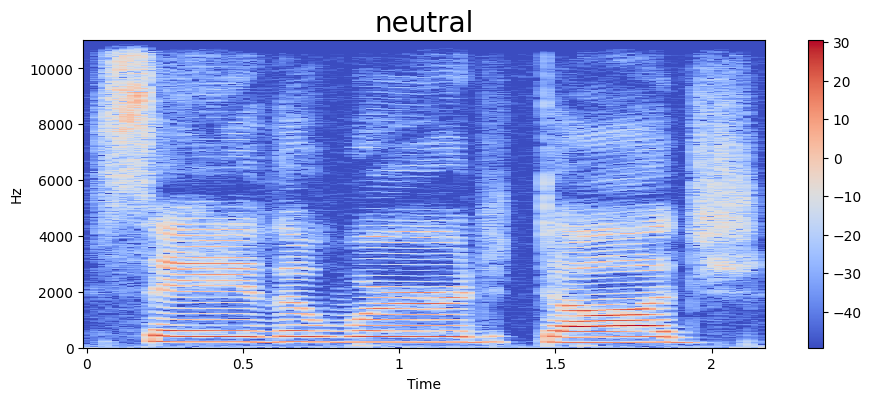

In [44]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

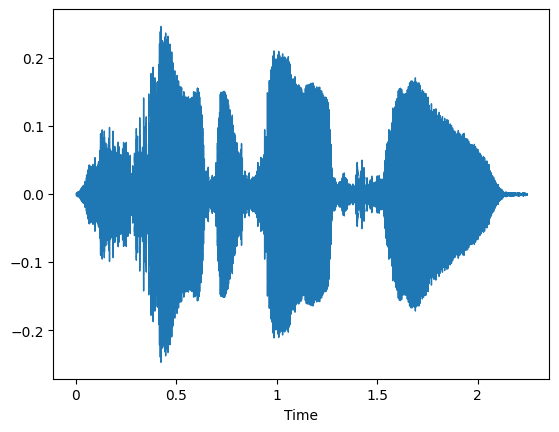

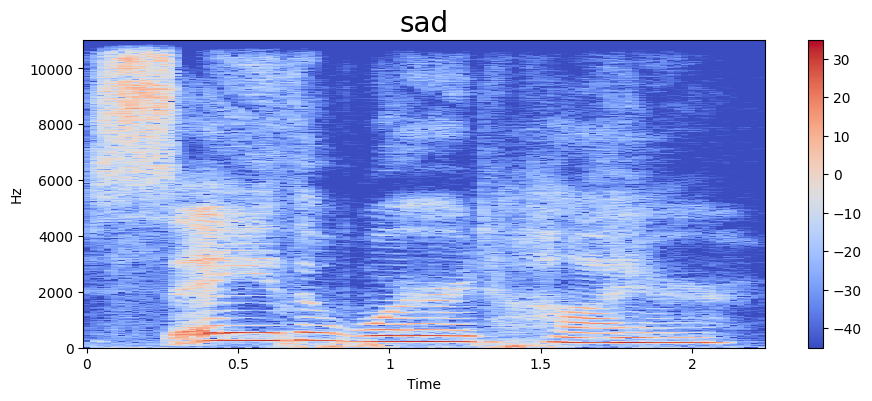

In [45]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

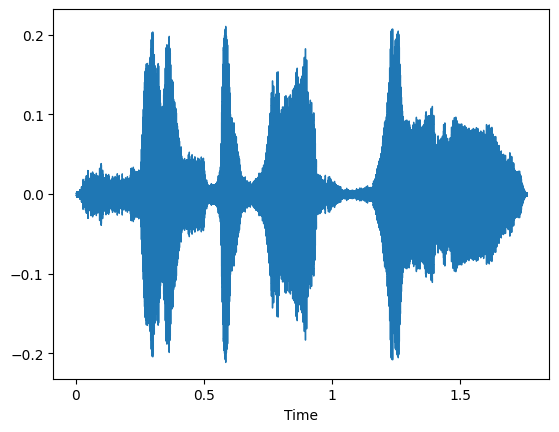

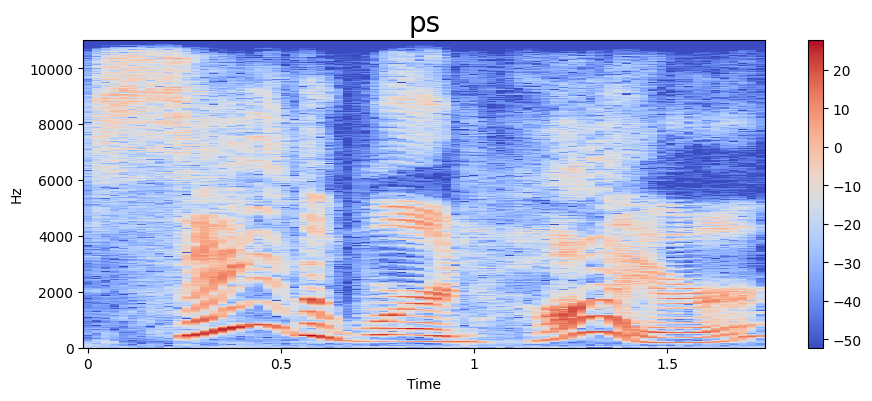

In [46]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

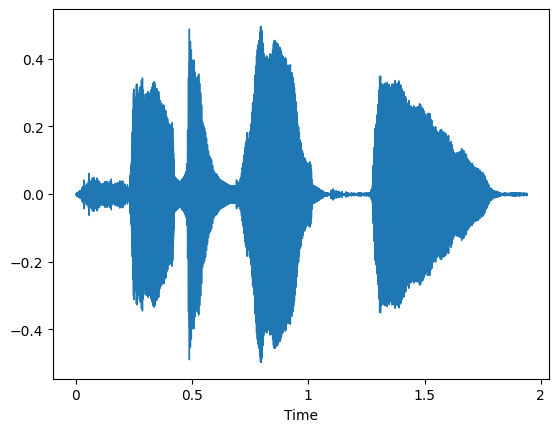

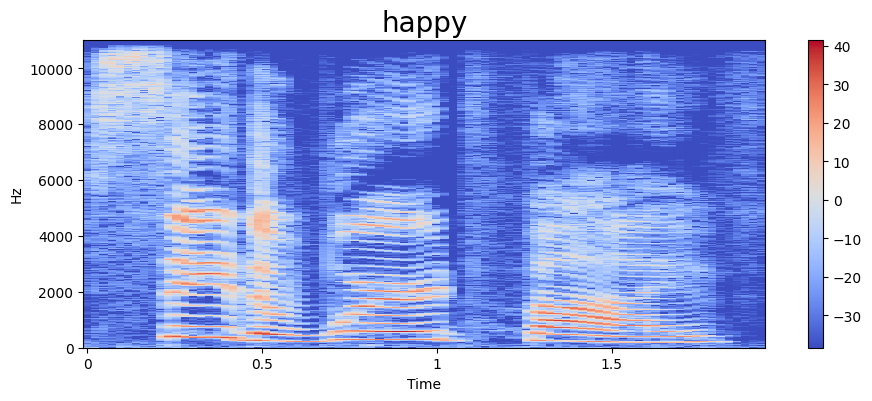

In [47]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [48]:
# Audio feature extraction method
# Mel-frequency cepstral coefficients (MFCC)
# It extract audio feature
#  https://jonathan-hui.medium.com/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9

def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [49]:
# display the MFCC of 0th index audio
extract_mfcc(df['speech'][0])

array([-206.61783   ,   95.52746   ,   -4.6095138 ,   26.713736  ,
        -19.664524  ,    0.34541416,  -21.250097  ,  -18.742357  ,
        -18.946571  ,   -6.830644  ,  -14.135023  ,  -11.633578  ,
         -5.347384  ,   -6.360036  ,    2.400924  ,   -5.432252  ,
         -7.0566573 ,   -2.52252   ,   -2.4959702 ,   -6.8908663 ,
          1.0400809 ,    4.0767436 ,    4.104591  ,    4.166913  ,
          7.398297  ,    6.3764977 ,    5.9534807 ,   10.052659  ,
          6.928567  ,    9.167687  ,    8.606496  ,    4.945601  ,
          4.118296  ,    2.0500622 ,    1.2016147 ,    3.4111457 ,
          1.6554148 ,    3.2344947 ,    2.7435303 ,   -1.2258763 ],
      dtype=float32)

In [51]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [52]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape
# 2800 audio files and 40 features of audio file

(4563, 40)

In [53]:
# convert the feature into 1 dimention
X = np.expand_dims(X, -1)
X.shape

(4563, 40, 1)

In [54]:
# Mapped label into numbers  example (sad -> 0 , happy -> 1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(4563, 335)

In [67]:
# show the label mapped values
label_index_mapping = {i: label for i, label in enumerate(enc.categories_[0])}
print(label_index_mapping)

{0: 'a01', 1: 'a02', 2: 'a03', 3: 'a04', 4: 'a05', 5: 'a06', 6: 'a07', 7: 'a08', 8: 'a09', 9: 'a10', 10: 'a11', 11: 'a12', 12: 'a13', 13: 'a14', 14: 'a15', 15: 'abajo', 16: 'abandono', 17: 'abierto', 18: 'abuso', 19: 'acogedora', 20: 'acuarela', 21: 'acuatico', 22: 'adios', 23: 'aficion', 24: 'afuera', 25: 'agencia', 26: 'aglomeracion', 27: 'agua', 28: 'aguijon', 29: 'alarma', 30: 'alegria', 31: 'alterado', 32: 'alto', 33: 'amenazado', 34: 'amenazador', 35: 'amistad', 36: 'angry', 37: 'ansiedad', 38: 'antes', 39: 'antiguo', 40: 'aplausos', 41: 'arana', 42: 'arriba', 43: 'arroz', 44: 'articulo', 45: 'astuto', 46: 'ataque', 47: 'atasco', 48: 'atomo', 49: 'atractivo', 50: 'aventurero', 51: 'ayer', 52: 'azulejo', 53: 'babosa', 54: 'baile', 55: 'barba', 56: 'bebe', 57: 'bello', 58: 'bola', 59: 'boton', 60: 'broma', 61: 'caducado', 62: 'calma', 63: 'calmado', 64: 'cansancio', 65: 'caprichoso', 66: 'carcajada', 67: 'catastrofe', 68: 'ceguera', 69: 'celda', 70: 'celebracion', 71: 'chiminea', 7

In [68]:
# Neural network summary

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
# Train the model total 50 epochs

epoch = 50
from keras.utils import to_categorical

# Convertir etiquetas a one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=7)


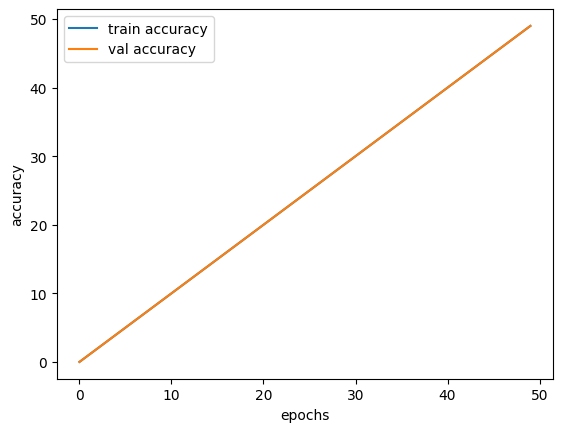

In [93]:
# Display the Train accuracy and validation accuracy graph

epochs = list(range(epoch))

plt.plot(epochs, label='train accuracy')
plt.plot(epochs, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

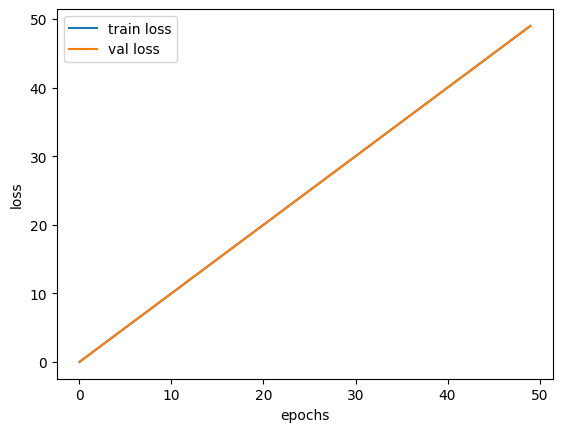

In [96]:
# Display the loss and validation loss graph

plt.plot(epochs,  label='train loss')
plt.plot(epochs, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [97]:
y_pred = model.predict(X_test)

48/48 [==============================] - 3s 39ms/step


In [98]:
import numpy as np

y_pred_labels = np.argmax(y_pred, axis=1)

In [99]:
y_test_labels = np.argmax(y_test, axis=1)


In [100]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_labels, y_pred_labels)

In [101]:
print(accuracy*100,"% accuracy")


0.13280212483399734 % accuracy


In [102]:
len(paths)


4563

In [103]:
paths[::500]


['/content/drive/MyDrive/data/SAVEE/JK_f12.wav',
 '/content/drive/MyDrive/data/CREMAD/1003_MTI_HAP_XX.wav',
 '/content/drive/MyDrive/data/MESD/Fear_F_B_ceguera.wav',
 '/content/drive/MyDrive/data/MESD/Sadness_C_A_derecha.wav',
 '/content/drive/MyDrive/data/TESS/YAF_fear/YAF_loaf_fear.wav',
 '/content/drive/MyDrive/data/TESS/YAF_disgust/YAF_third_disgust.wav',
 '/content/drive/MyDrive/data/TESS/YAF_angry/YAF_bone_angry.wav',
 '/content/drive/MyDrive/data/TESS/OAF_disgust/OAF_sub_disgust.wav',
 '/content/drive/MyDrive/data/TESS/OAF_Pleasant_surprise/OAF_cheek_ps.wav',
 '/content/drive/MyDrive/data/TESS/OAF_happy/OAF_met_happy.wav']

In [111]:
new_paths = ['/content/drive/MyDrive/data/TESS/YAF_fear/YAF_home_fear.wav',
 '/content/drive/MyDrive/data/TESS/YAF_angry/YAF_shack_angry.wav',
 '/content/drive/MyDrive/data/TESS/YAF_disgust/YAF_sail_disgust.wav',
 '/content/drive/MyDrive/data/TESS/YAF_happy/YAF_jail_happy.wav',
 '/content/drive/MyDrive/data/TESS/YAF_sad/YAF_red_sad.wav']

pred_df = pd.DataFrame({'speech':new_paths})

In [112]:
pred_X_mfcc = pred_df['speech'].apply(lambda x: extract_mfcc(x))
pred_X = [x for x in pred_X_mfcc]
pred_X = np.array(pred_X)
pred_X = np.expand_dims(pred_X, -1)

In [113]:
model.predict(pred_X)[0]


1/1 [==============================] - 0s 40ms/step


array([0.13560866, 0.12700425, 0.12358928, 0.15540764, 0.18001392,
       0.13607393, 0.14230224], dtype=float32)

In [114]:
for i in model.predict(pred_X):
    print(labels[i.argmax()])

1/1 [==============================] - 0s 39ms/step
sad
disgust
disgust
sad
sad


In [115]:
model.save("speech_model.h5")